# Machine Learning

--- 
## Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sb.set()

In [3]:
import torch 
import torch.nn as nn
import torch.optim as optim

device = 'cuda' if torch.cuda.is_available() else 'cpu'

--- 
## Load Data

In [4]:
path = '../data/'
X = pd.read_csv(path+'predictors.csv')
y = pd.read_csv(path+'response.csv')

In [5]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.507815,1.067684,-1.359169,-0.634726,-0.151489,-0.440288,-0.284872,0.792999,1.407110,-0.609881,-0.999868
1,-0.231693,2.155100,-1.359169,0.958867,1.429734,1.194104,1.048424,0.160585,-0.966139,0.454808,-0.586373
2,-0.231693,1.430156,-1.137375,0.275898,0.998491,0.026681,0.523186,0.287068,-0.506801,0.188636,-0.586373
3,2.115342,-1.469620,1.745950,-0.634726,-0.223362,0.260166,0.765604,0.919482,-1.272365,-0.432433,-0.586373
4,-0.507815,1.067684,-1.359169,-0.634726,-0.151489,-0.440288,-0.284872,0.792999,1.407110,-0.609881,-0.999868


In [6]:
y.head()

,quality
0,1
1,1
2,1
3,1
4,1


In [7]:
# m samples, n features
m, n = X.shape
print(m, n)

1142 11


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

--- 
## Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

### Build Model

In [10]:
# find optimal max_depth

# use a smaller dataset to find optimal max_depth
X_train_try, X_test_try, y_train_try, y_test_try = train_test_split(X_train, y_train, train_size=0.7)
for depth in range(2, 10):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train_try, y_train_try)
    print(f"For depth {depth}, train accuracy {model.score(X_train_try, y_train_try):.4f}, test accuracy {model.score(X_test_try, y_test_try):.4f}.")

For depth 2, train accuracy 0.8513, test accuracy 0.8394.
For depth 3, train accuracy 0.8779, test accuracy 0.8759.
For depth 4, train accuracy 0.8983, test accuracy 0.8613.
For depth 5, train accuracy 0.9264, test accuracy 0.8650.
For depth 6, train accuracy 0.9499, test accuracy 0.8613.
For depth 7, train accuracy 0.9640, test accuracy 0.8650.
For depth 8, train accuracy 0.9828, test accuracy 0.8358.
For depth 9, train accuracy 0.9859, test accuracy 0.8504.


In [11]:
# choose 4 as max_depth
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

### Plot Decision Tree

[Text(0.4351851851851852, 0.9, 'alcohol <= 0.602\ngini = 0.268\nsamples = 913\nvalue = [26, 772, 115]\nclass = 1'),
 Text(0.16666666666666666, 0.7, 'pH <= -2.306\ngini = 0.142\nsamples = 650\nvalue = [23, 601, 26]\nclass = 1'),
 Text(0.07407407407407407, 0.5, 'pH <= -2.497\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = 2'),
 Text(0.037037037037037035, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = 1'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]\nclass = 2'),
 Text(0.25925925925925924, 0.5, 'volatile acidity <= 2.064\ngini = 0.132\nsamples = 645\nvalue = [23, 600, 22]\nclass = 1'),
 Text(0.18518518518518517, 0.3, 'sulphates <= 0.499\ngini = 0.119\nsamples = 622\nvalue = [17, 583, 22]\nclass = 1'),
 Text(0.14814814814814814, 0.1, 'gini = 0.088\nsamples = 504\nvalue = [16, 481, 7]\nclass = 1'),
 Text(0.2222222222222222, 0.1, 'gini = 0.237\nsamples = 118\nvalue = [1, 102, 15]\nclass = 1'),
 Text(0.3333333333333333, 0.3, 'free sulfur dioxide

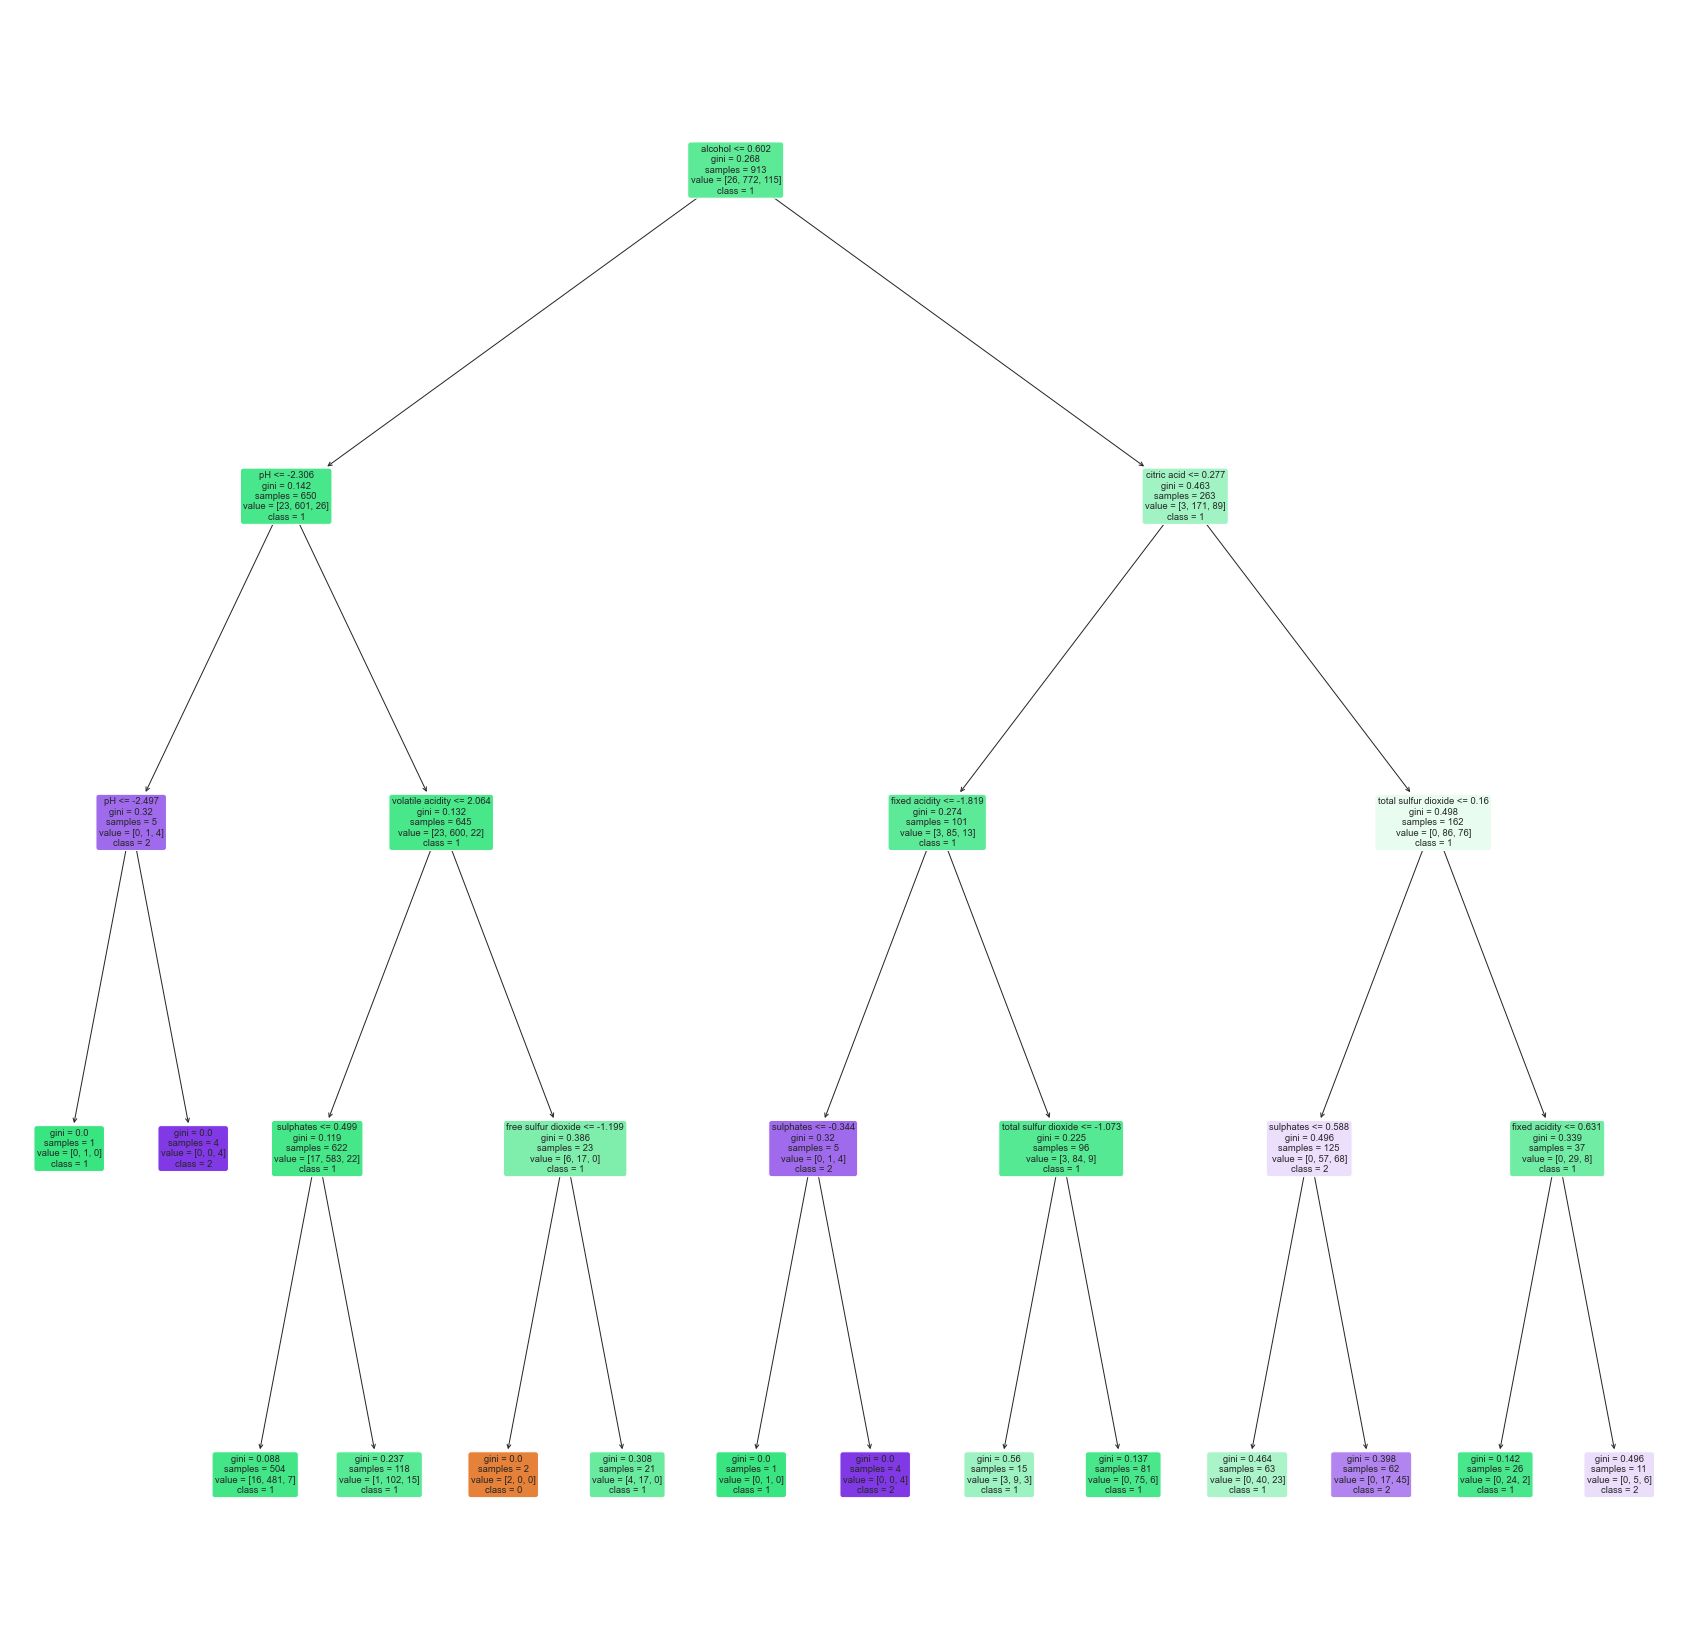

In [12]:
from sklearn.tree import plot_tree

classes = ['0', '1', '2']
f = plt.figure(figsize=(30, 30))
plot_tree(decision_tree=model, 
            filled=True,
            rounded=True,
            feature_names=X_train.columns,
            class_names=classes)

### Evaluate Model

In [13]:
# overall accuracy
print(f"For training data, accuracy={model.score(X_train, y_train)}.")
print(f"For testing data, accuracy={model.score(X_test, y_test)}.")


For training data, accuracy=0.8882803943044907.
For testing data, accuracy=0.868995633187773.


In [14]:
from sklearn.metrics import confusion_matrix

def oneVsAllEvaluation(y_true, y_predict, plotConfusionMatrix=True)->float:
    '''
    A utility function to evaluate predicting one variable against others
    Input: actual response, predicted response, whether plot the confusion matrix or not
    Output: average accuracy
    '''
    accu_sum = 0
    for i in range(0, 3):
        y_temp = y_true.copy()
        y_temp_pred = y_predict.copy()
        for j in range(y_temp.size):
            if (y_temp.iloc[j][0] == i):
                y_temp.iloc[j][0] = 1
            else:
                y_temp.iloc[j][0] = 0
            if (y_temp_pred[j] == i):
                y_temp_pred[j] = 1
            else:
                y_temp_pred[j] = 0
        
        cm = confusion_matrix(y_temp, y_temp_pred)
        tn = cm[0][0] # True Negatives : Bad (0) predicted Bad (0)
        tp = cm[1][1] # True Positives : Good (1) predicted Good (1)
        fp = cm[0][1] # False Positives : Bad (0) predicted Good (1)
        fn = cm[1][0] # False Negatives : Good (1) predicted Bad (0)
        accu = ((tp+tn)/(tp+tn+fp+fn)) 
        accu_sum += accu
        
        print("Value {} versus others: ".format(i))
        print("Acc:\t", accu)
        print("TPR:\t", (tp/(tp + fn)))
        print("TNR:\t", (tn/(tn + fp)))
        print("FPR:\t", (fp/(fp + tn)))
        print("FNR:\t", (fn/(fn + tp)))
        print()

        if (plotConfusionMatrix):
            f = plt.figure(figsize=(5, 5))
            sb.heatmap(confusion_matrix(y_temp, y_temp_pred), 
                annot = True, fmt=".0f", annot_kws={"size": 18})
            f.text(0, 1, "Value {} versus others:".format(i))

    return accu_sum / n

Value 0 versus others: 
Acc:	 0.9737130339539978
TPR:	 0.07692307692307693
TNR:	 1.0
FPR:	 0.0
FNR:	 0.9230769230769231

Value 1 versus others: 
Acc:	 0.8882803943044907
TPR:	 0.9715025906735751
TNR:	 0.4326241134751773
FPR:	 0.5673758865248227
FNR:	 0.02849740932642487

Value 2 versus others: 
Acc:	 0.9145673603504929
TPR:	 0.5130434782608696
TNR:	 0.9724310776942355
FPR:	 0.02756892230576441
FNR:	 0.48695652173913045



0.25241461714627106

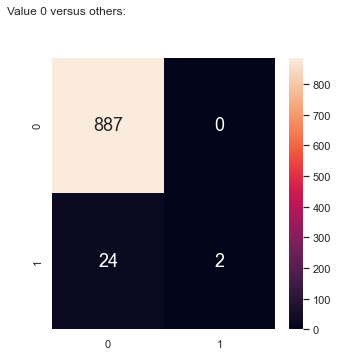

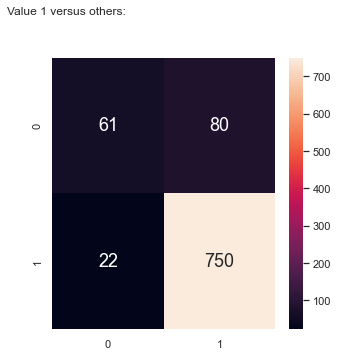

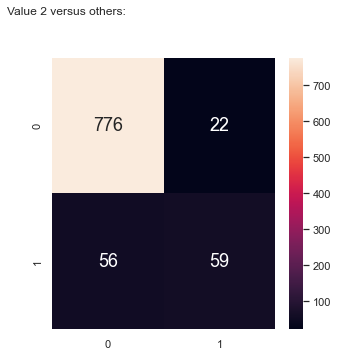

In [15]:
# Evaluation of train data
y_train_pred = model.predict(X_train)
oneVsAllEvaluation(y_train, y_train_pred)

Value 0 versus others: 
Acc:	 0.9650655021834061
TPR:	 0.0
TNR:	 1.0
FPR:	 0.0
FNR:	 1.0

Value 1 versus others: 
Acc:	 0.868995633187773
TPR:	 0.9844559585492227
TNR:	 0.25
FPR:	 0.75
FNR:	 0.015544041450777202

Value 2 versus others: 
Acc:	 0.9039301310043668
TPR:	 0.32142857142857145
TNR:	 0.9850746268656716
FPR:	 0.014925373134328358
FNR:	 0.6785714285714286



0.24890829694323144

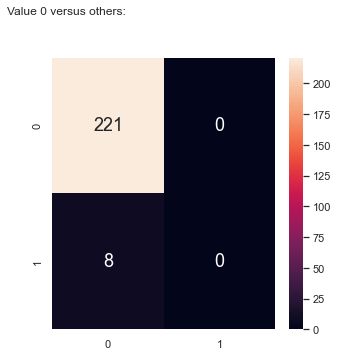

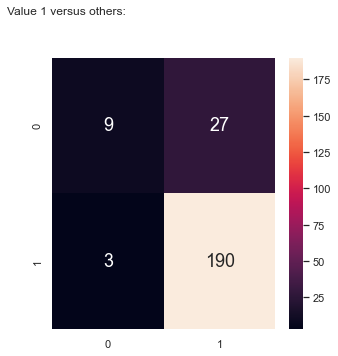

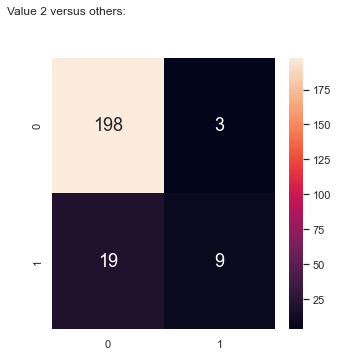

In [16]:
# Evaluation of train data
y_test_pred = model.predict(X_test)
oneVsAllEvaluation(y_test, y_test_pred)

--- 
## Stochastic Gradient Descent

In [17]:
# Store a copy of original data frame data
X_train_cp = X_train.copy()
y_train_cp = y_train.copy()
X_test_cp = X_test.copy()
y_test_cp = y_test.copy()


In [18]:
# Convert 
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [19]:
# Design Model
class SGD(nn.Module):
    def __init__(self, n):
        super(SGD, self).__init__()
        self.linear = nn.Linear(n, 3)

    def forward(self, X):
        y_pred = torch.sigmoid(self.linear(X))
        return y_pred


In [20]:
model = SGD(n)

In [21]:
# Setup parameters
learning_rate = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
num_epochs = 1000

In [25]:
# Training loop
cost_hist = [None] * num_epochs
for epoch in range(num_epochs):
    # forward passing
    y_train_pred = model(X_train)
    loss = criterion(y_train_pred, y_train)

    # backward passing
    loss.backward()

    # update weights
    optimizer.step()
    optimizer.zero_grad()

    if (epoch % 10 == 1):
        print(f'epoch: {epoch}, loss = {loss.item():.4f}')

    cost_hist[epoch] = loss.item()

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / y_test.shape[0]
    print(f'Accuracy {acc}.')

    # print cost function 
    f = plt.figure()
    epochs = np.arange(num_epochs)
    plt.plot(epochs, cost_hist)
    plt.show()

RuntimeError: 0D or 1D target tensor expected, multi-target not supported